<a href="https://colab.research.google.com/github/macario-glitch/CID-Clasificacion-Inteligente-de-Datos-/blob/main/Hands_On_2_KNN/Hands_On_2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mario Marquez Garza - 218617269

# Fundamentos de la técnica: K-nearest neighbors. **(KNN)**

El KNN es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión, que a diferencia de otros modelos, no realiza una fase explícita de entrenamiento: simplemente almacena los datos de entrenamiento y, cuando se presenta un nuevo dato, determina su clase o valor en función de los K vecinos más cercanos en el espacio de características.

Por esta razón, se le considera un método basado en instancias o aprendizaje perezoso *(lazy learning)*, ya que el modelo no aprende una función general, sino que toma decisiones directamente usando los ejemplos almacenados.

**Funcionamiento**

Supongamos que tenemos un conjunto de datos ya clasificados. Y ahora uno nuevo llega.

**Elegimos el valor de K:** Cuantos vecinos tomaremos en cuenta. Se recomienda elegir un numero impar, para evitar empates (Clasificación).

**Calculamos las distancias:** Se calcula que tan cerca esta el nuevo elemento de cada punto del conjunto de entrenamiento. Normalmente se usa la distancia Euclidiana, aun que tambien se pueden utilizar la distancia Manhattan, Nikowski o Hamming, pero ya depende del tipo de datos.

**Buscar los K vecinos más cercanos:** Se ordenan las distancias en orden ascendente y se quedan los K puntos más cercanos.

**Resultado:**


*   Votar (Clasificación): La clase con mayor aparición sera la predicción. K= 5. Si los 5 vecinos son de clase: [1,0,1,0,1]. Entonces el nuevo punto será clasificado como 1
*   Promediar (Regresión): Se promedian los valores de los vecinos para obtener la predicción.



# Metodo Matematico del KNN.

Dado un conjunto de datos:

***D* = {(x1,y1),...(xn,yn)}**

Se desea predecir una etiqueta *yq* de un nuevo punto *xq*.

**Distancia Eucladiana. (Más común)**

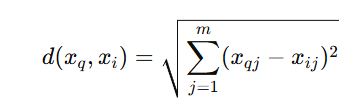

**xq:** Punto Nuevo.

**xi:** Punto de entrenamiento

**Selección de vecinos más cercanos.**

**Nk(xq) = {(x(1)y(1)),...,(x(n),y(n))}**

**Nk:** Representa el conjunto de vecinos más cercanos al nuevo punto.

**Votación (Clasificación):**

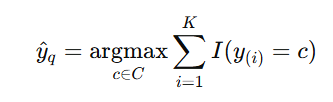

**C:** El conjunto de datos posibles.

**[c∈C] argmax:** Indica que se busca el valor de c (una clase en el conjunto de clases C) que maximiza la expresión que sigue. Es decir, se busca la clase que tenga la mayor cantidad de vecinos cercanos con esa etiqueta.

**I:** Es la función indicadora (una función que devuelve 1 si la condición es verdadera y 0 si es falsa). Aquí, indica si la etiqueta del vecino i, es igual a la clase c.


**Promedio (Regresión)**

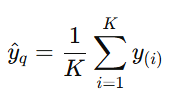



**Preprocesamiento**

Pimeras filas:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Análisis estadístico:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


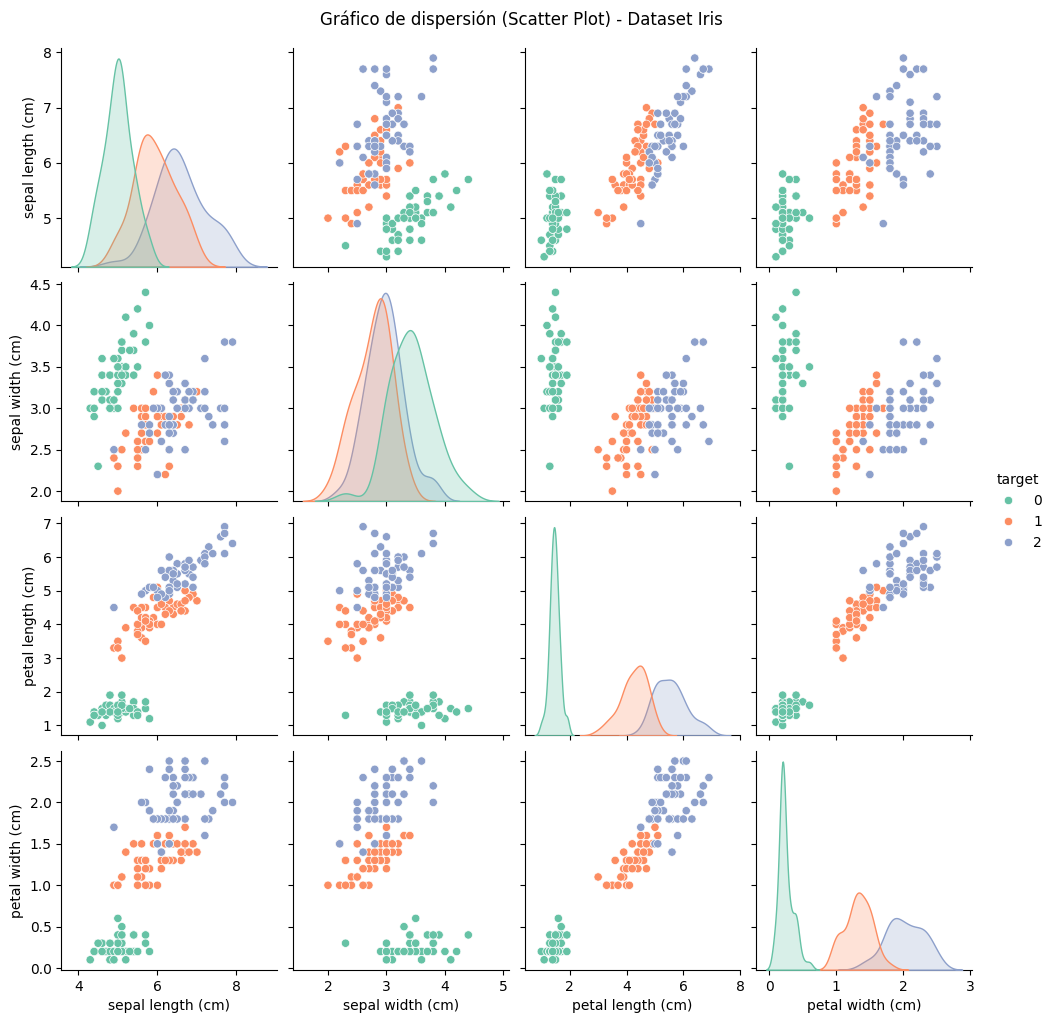

Correlación con la variable objetivo:

 petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64


In [19]:
import numpy as np
import pandas as pd #Manejo de datos
import matplotlib.pyplot as plt
import seaborn as sns #Visualización de datos y graficos estadisticos

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#Cargar Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names) #Variables de entrada (features)
y = pd.Series(iris.target, name="target") #Variables de salida (target)

#Inspección inicial del dataset
print("Pimeras filas:\n")
display(X.head())
print("\nAnálisis estadístico:\n")
display(X.describe())

sns.pairplot(pd.concat([X, y], axis=1), hue="target", palette="Set2")
plt.suptitle("Gráfico de dispersión (Scatter Plot) - Dataset Iris", y=1.02)
plt.show()

df_corr = pd.concat([X, y], axis=1) #Se une nuevamente X e y en un solo DataFrame para calcular correlaciones
#Calcula la correlación entre cada variable y la clase ('target')
#Cuanto más alto sea el valor absoluto, mejor separa la variable las clases
corr = df_corr.corr(numeric_only=True)["target"].drop("target").sort_values(ascending=False)

print("Correlación con la variable objetivo:\n\n", corr)

**Feature Engineering**

Como vimos en los resultados de la anterior sección, las variables más informativas y eficientes son petal width, petal length y sepal lenght. Ya que tienen una gran alta correlación con la variable objetivo

In [29]:
#Normalización de los datos
X_new = X[["petal width (cm)", "petal length (cm)", "sepal length (cm)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=35, stratify=y
)

print("\nDatos de entrenamiento:", X_train.shape[0], "\nDatos de prueba:", X_test.shape[0])


Datos de entrenamiento: 105 
Datos de prueba: 45


**Model Training**

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Prediction**

In [31]:
def predecir_patron(modelo, patron, clase_real):
    """
    Recibe un patrón (lista o numpy array con 4 valores)
    y muestra la clase predicha del Iris.
    """
    patron = np.array(patron).reshape(1, -1)
    prediccion = modelo.predict(patron)[0]
    clase_predicha = iris.target_names[prediccion]

    print(f"Clase predicha: {clase_predicha}")
    print(f"Clase real: {iris.target_names[clase_real]}")


predecir_patron(knn, X_test[12], y_test.iloc[12])

Clase predicha: versicolor
Clase real: versicolor


**Model Evaluation**

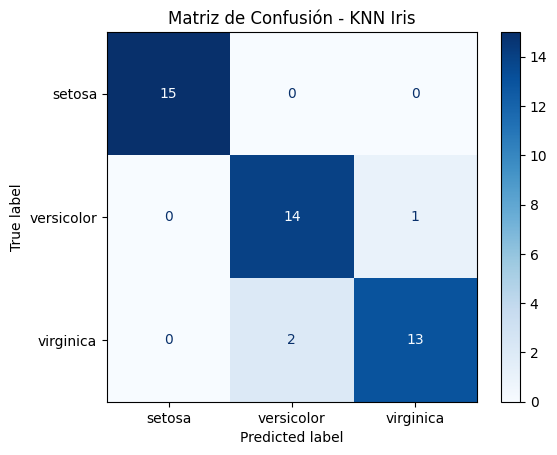

Exactitud (Accuracy) del modelo: 0.933


In [32]:
#predicciones sobre los datos de prueba
y_pred = knn.predict(X_test)

#Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - KNN Iris")
plt.show()

#Exactitud
acc = accuracy_score(y_test, y_pred)
print(f"Exactitud (Accuracy) del modelo: {acc:.3f}")

**Referencias Bibliográficas**

AprendeIA con Ligdi Gonzalez. (2019, July 19). K VECINOS MÁS CERCANOS - TEORÍA | #39 Curso Machine Learning con Python [Video]. YouTube. https://www.youtube.com/watch?v=FHHuo7xEeo4

Ibm. (2025, October 7). KNN. IBM. https://www.ibm.com/mx-es/think/topics/knn

Díaz, R. (2024, July 6). Algoritmo KNN – cómo funciona y ejemplos en Python. The Machine Learners. https://www.themachinelearners.com/algoritmo-knn/

load_iris. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris